In [ ]:
# Group - 5
# Midterm
######################
# Usman Jadoon
# Paola Dumbi
# Hussein Mawaw
# Malcolm Stephen
######################
# Data Source: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

Data Column Description

This dataset provides customer information to predict customer attrition for a consumer credit card portfolio

    CLIENTNUM: Unique identifier for each customer. (Integer)
    Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)
    Customer_Age: Age of customer. (Integer)
    Gender: Gender of customer. (String)
    Dependent_count: Number of dependents that customer has. (Integer)
    Education_Level: Education level of customer. (String)
    Marital_Status: Marital status of customer. (String)
    Income_Category: Income category of customer. (String)
    Card_Category: Type of card held by customer. (String)
    Months_on_book: How long customer has been on the books. (Integer)
    Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer)
    Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer)
    Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer)
    Credit_Limit: Credit limit of customer. (Integer)
    Total_Revolving_Bal: Total revolving balance of customer. (Integer)
    Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer)
    Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer)
    Total_Trans_Amt: Total transaction amount. (Integer)
    Total_Trans_Ct: Total transaction count. (Integer)
    Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)
    Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer)
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such


# Package Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from dmba import regressionSummary,AIC_score, BIC_score, backward_elimination, forward_selection, stepwise_selection
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from plotly import express as psx
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,auc,mean_squared_error, r2_score
import statsmodels.formula.api as sm
%matplotlib inline

#ignores Warnings
import warnings
warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


# Data Import

In [2]:
#Read csvs
df=pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# Data Cleaning

In [3]:
#Checking for count of unknown values
df[df == 'Unknown'].count()



CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

In [4]:
#Removing rows containing Unknown Values
df = df[df['Marital_Status'] != 'Unknown']
df = df[df['Education_Level'] != 'Unknown']
df = df[df['Income_Category'] != 'Unknown']
df.reset_index(drop=True, inplace=True)
df


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
4,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.999960
7077,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.999850
7078,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
7079,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [5]:
#Rechecking the total Unknown values
df[df == 'Unknown'].count()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
#Removing the columns we don't need and renaming 2 columns
df=df.drop(columns=['CLIENTNUM',
           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
# df.rename(columns = {
#     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "nbc_month_1",
#     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "nbc_month_2"},inplace=True)

In [7]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


# Data Visulaization

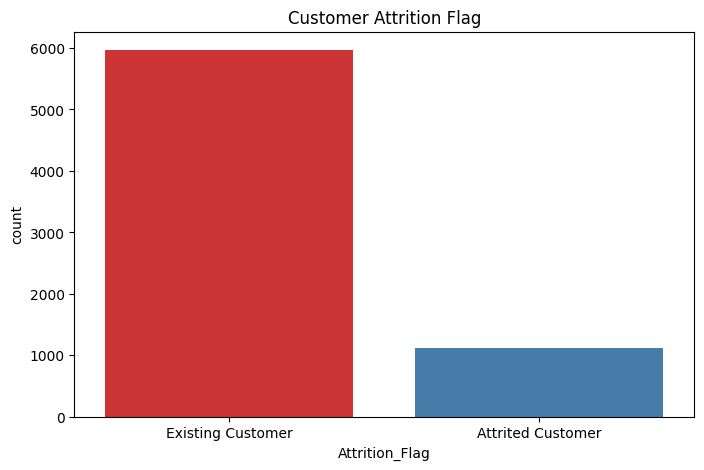

In [8]:
#Customer Attrition Flag
plt.figure(figsize = (8,5))
plt.title("Customer Attrition Flag")
sns.countplot(x = 'Attrition_Flag', palette="Set1",data = df)
plt.show()

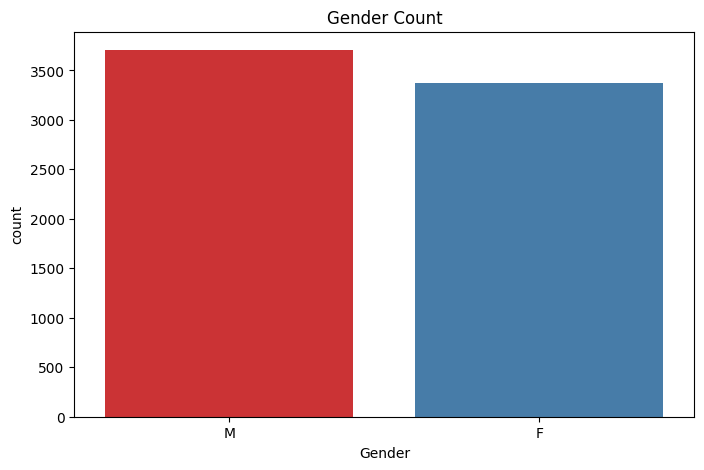

In [52]:
#Count of Gender
plt.figure(figsize = (8,5))
plt.title("Gender Count")
sns.countplot(x = 'Gender', palette="Set1",data = df)
plt.show()

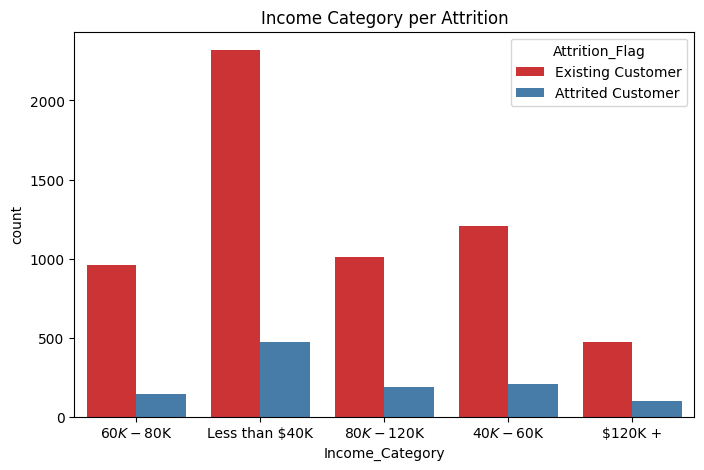

In [53]:
#Income Category per Attrition
plt.figure(figsize = (8,5))
plt.title("Income Category per Attrition")
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set1', data = df)
plt.show()

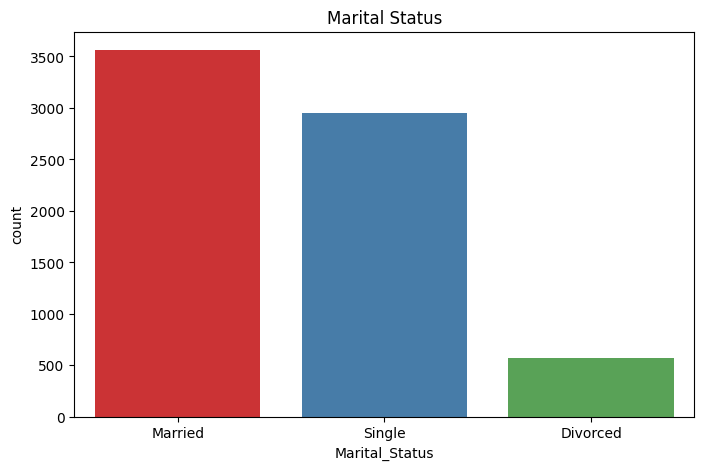

In [54]:
#Marital Status
plt.figure(figsize = (8,5))
plt.title("Marital Status")
sns.countplot(x = 'Marital_Status', palette = 'Set1', data = df)
plt.show()

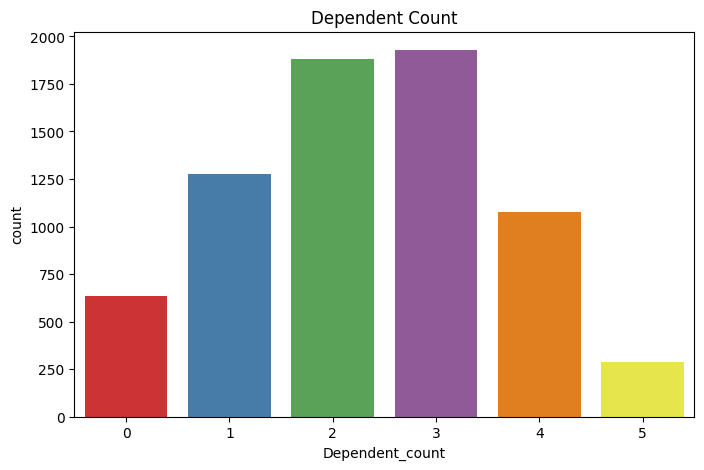

In [55]:
#Dependent Count
plt.figure(figsize = (8,5))
plt.title("Dependent Count")
sns.countplot(x = 'Dependent_count', palette = 'Set1', data = df)
plt.show()

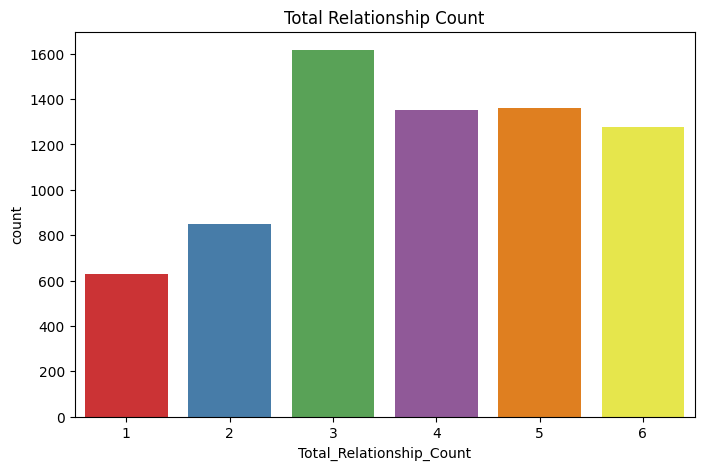

In [56]:
#Total Relationship Count
plt.figure(figsize = (8,5))
plt.title("Total Relationship Count")
sns.countplot(x = 'Total_Relationship_Count', palette = 'Set1', data = df)
plt.show()

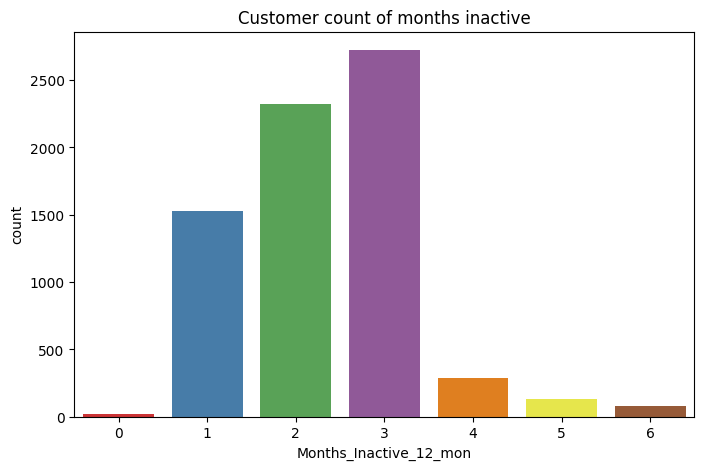

In [57]:
#Duration of Months inactive for customers
plt.figure(figsize = (8,5))
plt.title("Customer count of months inactive")
sns.countplot(x = 'Months_Inactive_12_mon', palette = 'Set1', data = df)
plt.show()

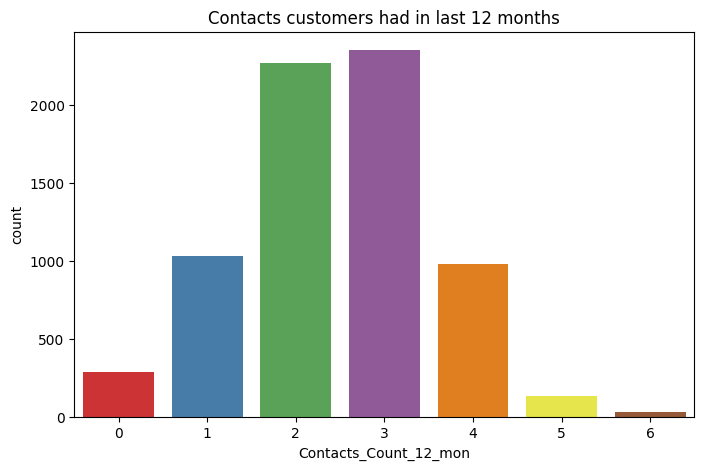

In [58]:
#Contacts customers had in last 12 months
plt.figure(figsize = (8,5))
plt.title("Contacts customers had in last 12 months")
sns.countplot(x = 'Contacts_Count_12_mon', palette = 'Set1', data = df)
plt.show()

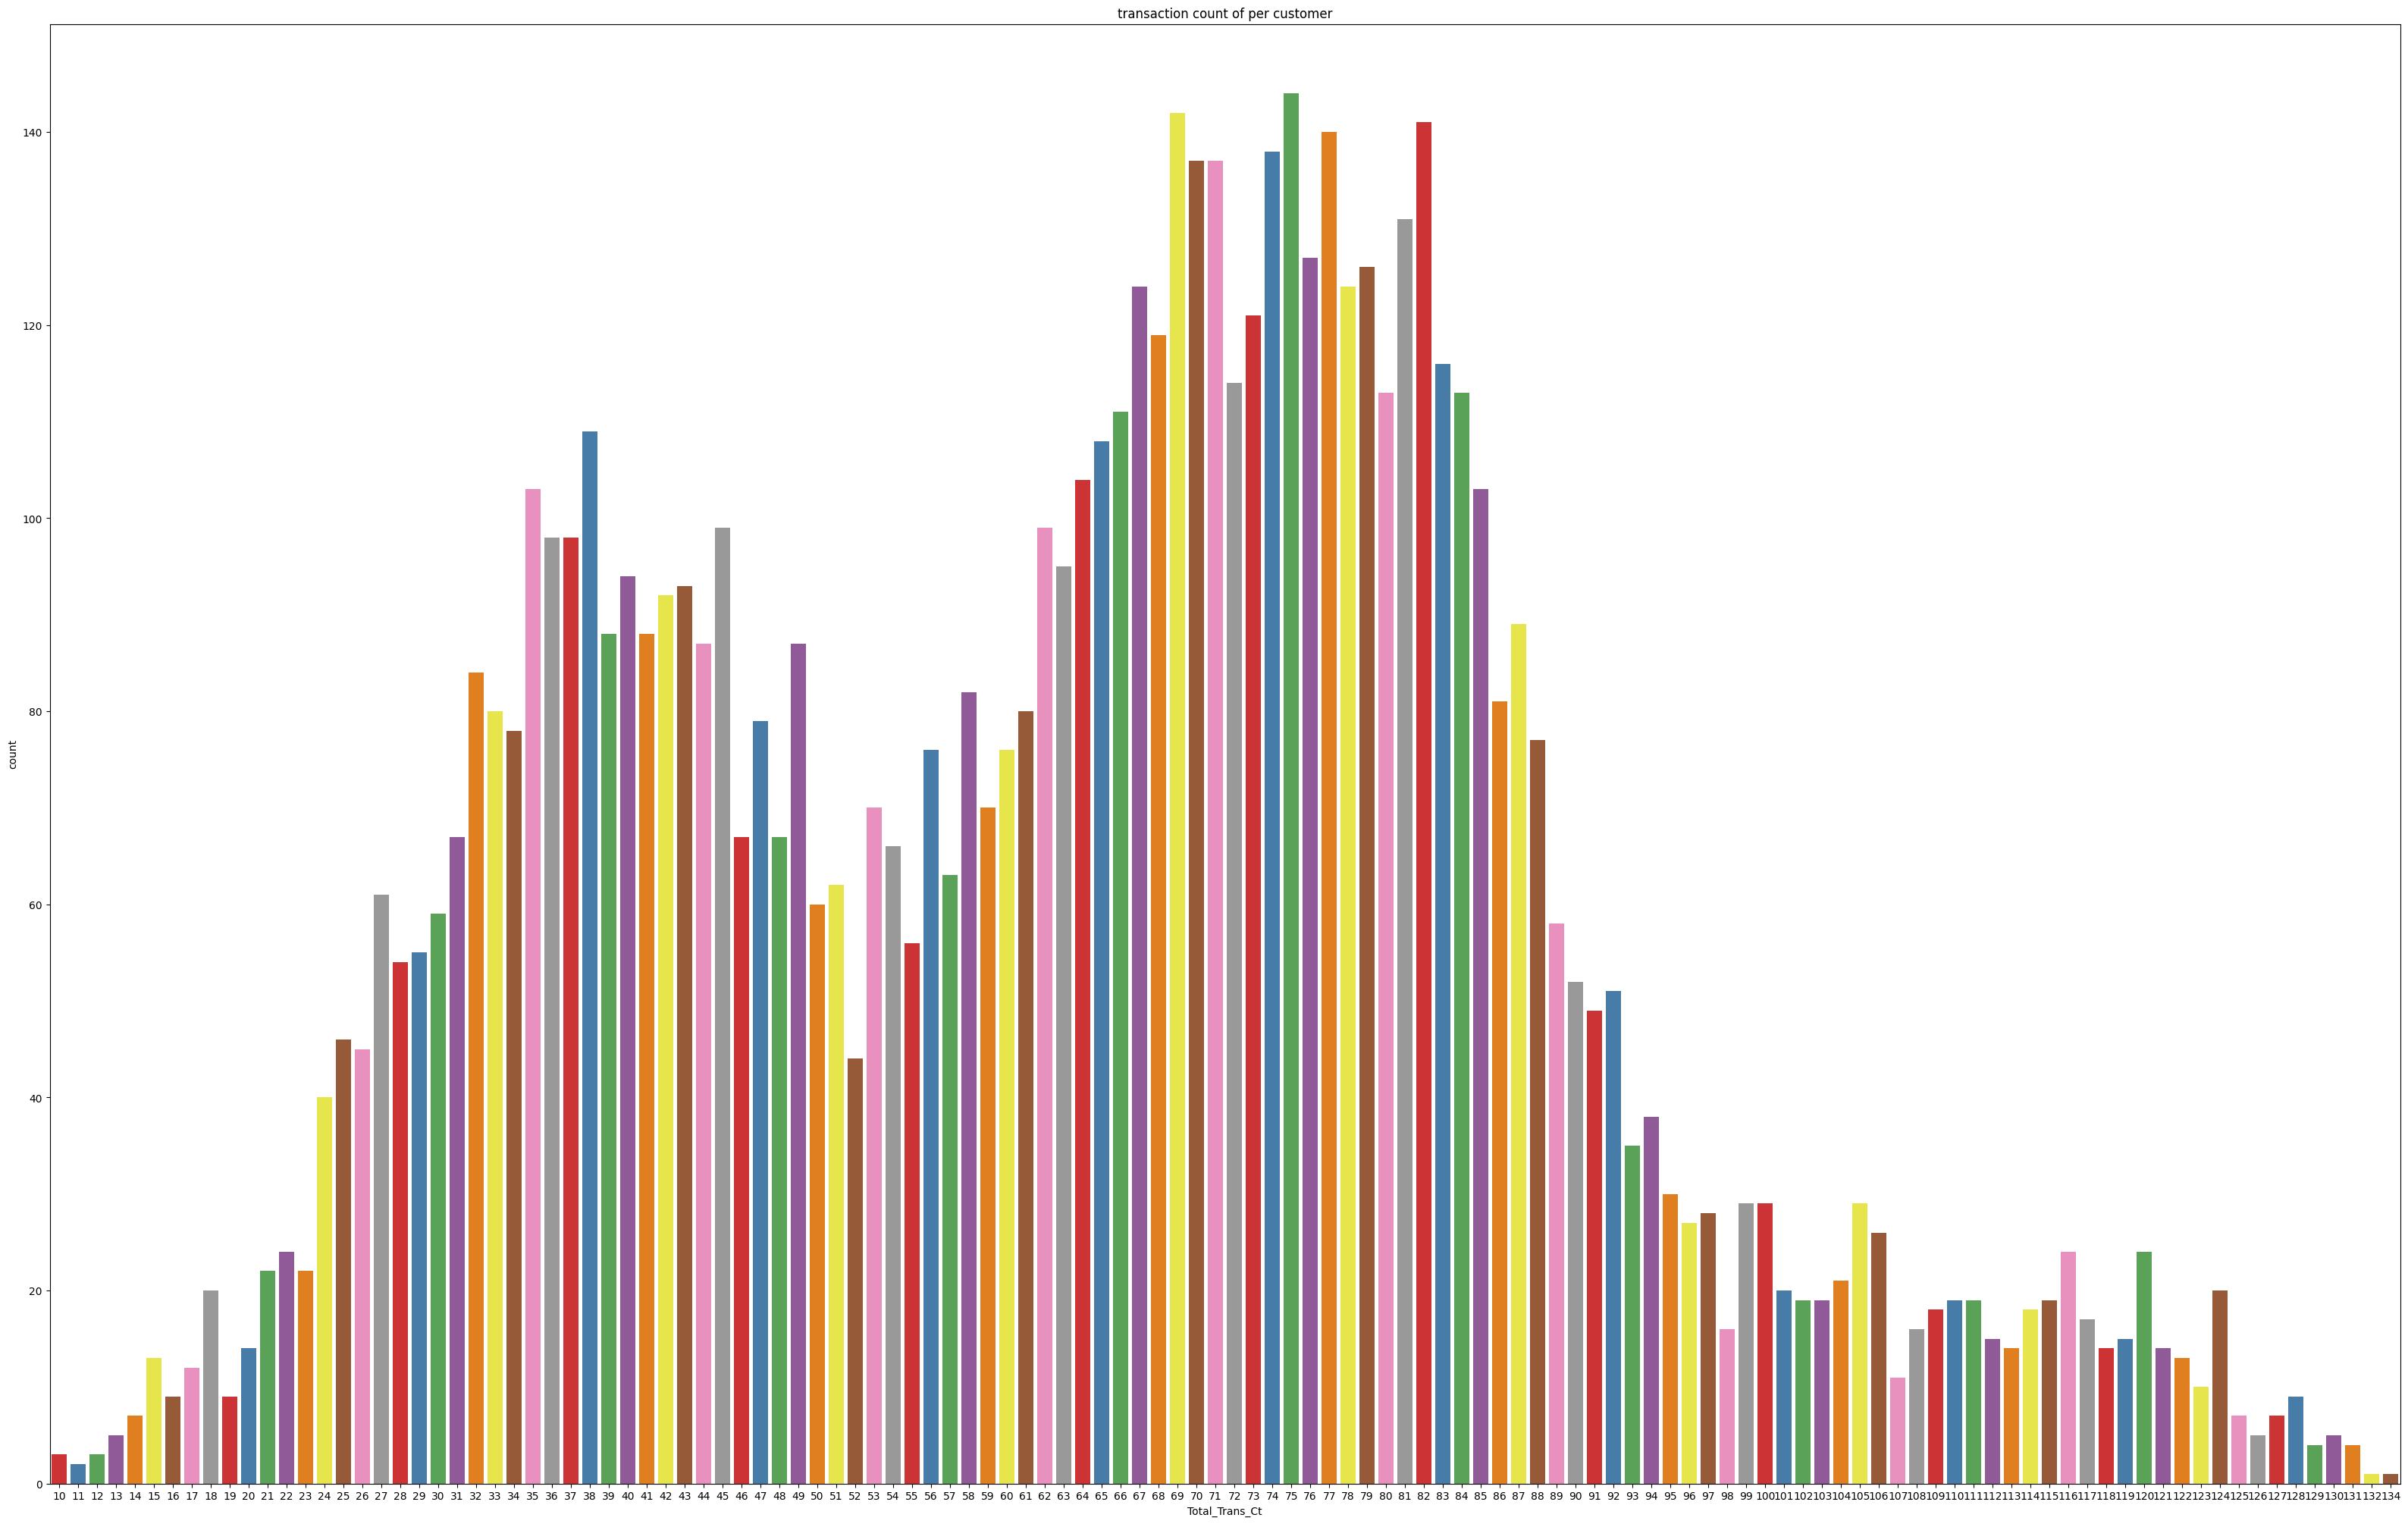

In [59]:
#Total transaction count. (Integer)
#Majority of transactions happened between 25 and 90 per customer
plt.figure(figsize = (40,25))
plt.title("transaction count of per customer")
sns.countplot(x = 'Total_Trans_Ct', palette = 'Set1', data = df)
plt.show()

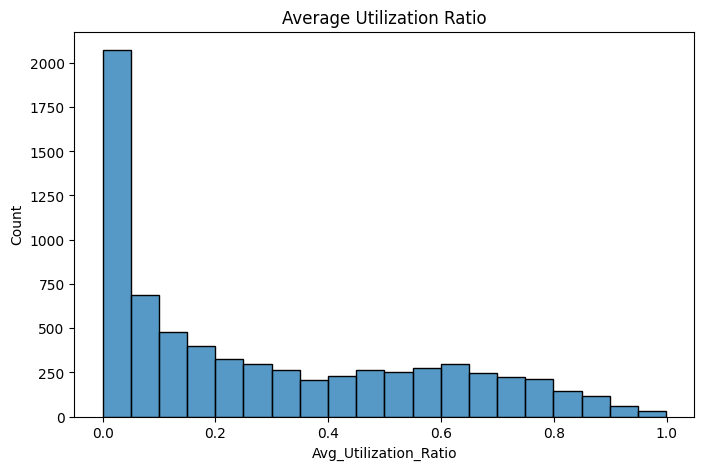

In [60]:
#Average Utilization Ratio
plt.figure(figsize = (8,5))
plt.title("Average Utilization Ratio")
sns.histplot(x = 'Avg_Utilization_Ratio', data = df)
plt.show()

# Data Cleaning 2

In [61]:
#Converting non-numerical values to numerical using sklearn labelencoder
non_numerical = ["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]

nn1 = dict()
lbe = LabelEncoder()
for c in non_numerical:
    nn1[c] = lbe.fit_transform(df.loc[:, c])
nndf = pd.DataFrame(nn1)
nndf

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,1,5,1,2,0
4,1,1,2,1,1,0
...,...,...,...,...,...,...
7076,1,1,3,2,2,0
7077,1,0,2,2,4,0
7078,1,1,2,2,1,0
7079,0,0,3,1,4,0


In [62]:
#Selecting columns that are not already selected above for concatination
orgcols = [x for x in df.columns if x not in non_numerical]
orgdf = df.loc[:, orgcols]
orgdf

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [63]:
#Joining two dataframes together
df = pd.concat([nndf, orgdf], axis=1)
df

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,1,2,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,2,2,4,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,2,1,3,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,1,5,1,2,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,1,1,2,1,1,0,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,1,1,3,2,2,0,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,1,0,2,2,4,0,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,1,1,2,2,1,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,0,0,3,1,4,0,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


# Data Description

In [64]:
df.describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,0.842819,0.523372,2.576331,1.335969,2.597373,0.180201,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,0.363997,0.499489,1.484144,0.619564,1.383065,0.694415,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,1.000000,1.000000,3.000000,2.000000,4.000000,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,1.000000,1.000000,5.000000,2.000000,4.000000,3.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int32  
 1   Gender                    7081 non-null   int32  
 2   Education_Level           7081 non-null   int32  
 3   Marital_Status            7081 non-null   int32  
 4   Income_Category           7081 non-null   int32  
 5   Card_Category             7081 non-null   int32  
 6   Customer_Age              7081 non-null   int64  
 7   Dependent_count           7081 non-null   int64  
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open

<AxesSubplot: >

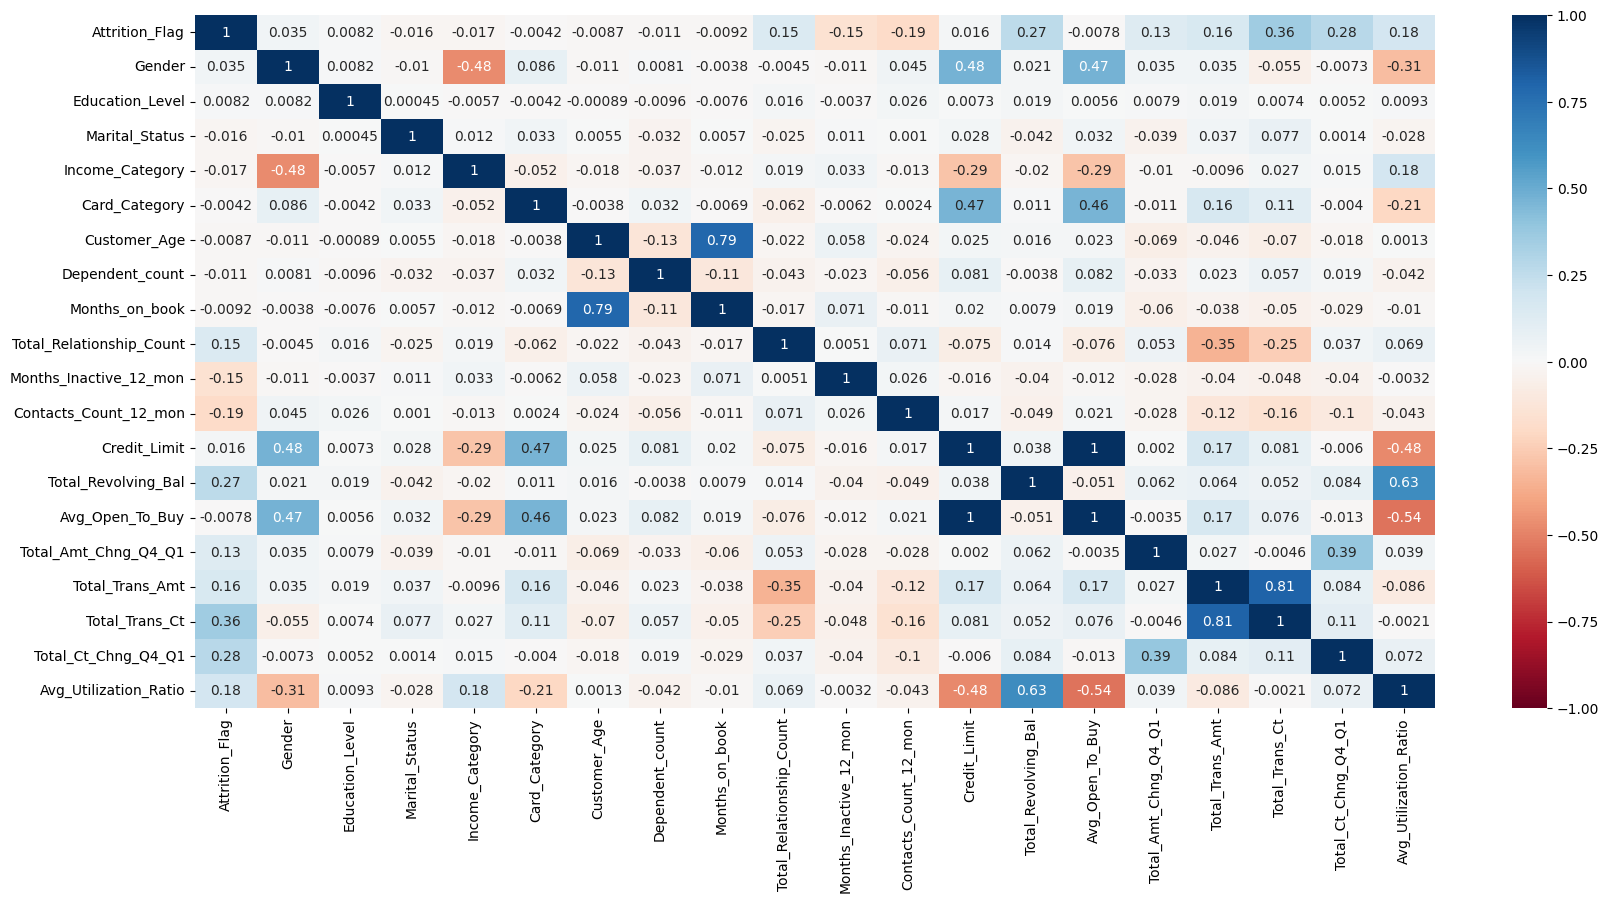

In [66]:
#Correlation Heatmap
plt.figure(figsize = (20,9))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu', vmin=-1, vmax=1)

In [67]:
#setting main df to dummy df, so that main df stays same incase of unforeseen issues
df2 = df

In [68]:
#Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample dummy is calculated as:
#     z = (dummy - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

neededcols = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Trans_Ct','Avg_Utilization_Ratio','Income_Category']
dummy = df2[neededcols]

scaler = StandardScaler()
scaler.fit(dummy)

std_data = scaler.transform(dummy)
std_df = pd.DataFrame(std_data)
std_df.columns = [i for i in neededcols]
std_df

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct,Avg_Utilization_Ratio,Income_Category
0,0.512710,0.764487,-1.349309,0.493777,-0.945214,-0.794057,-0.431950
1,2.061228,1.412015,-1.349309,-0.411332,-1.323244,-0.636187,1.014215
2,0.512710,0.116959,-1.349309,-2.221550,-1.869287,-1.012921,0.291133
3,0.512710,0.764487,-1.349309,-2.221550,-1.533260,-1.012921,-0.431950
4,-0.261549,-0.530569,-1.349309,-0.411332,-1.701273,0.102927,-1.155033
...,...,...,...,...,...,...,...
7076,-1.035808,0.764487,-0.344317,-2.221550,2.079024,-0.471142,-0.431950
7077,-1.035808,0.116959,-1.349309,1.398886,2.331044,-0.424499,1.014215
7078,-0.261549,-0.530569,-0.344317,0.493777,2.205034,0.644706,-1.155033
7079,-1.035808,0.764487,0.660674,1.398886,-0.189154,-1.012921,1.014215


In [69]:
#grabbing dummy column from df
dummy2=df2["Gender"]
dummy2

0       1
1       0
2       1
3       1
4       1
       ..
7076    1
7077    0
7078    1
7079    0
7080    0
Name: Gender, Length: 7081, dtype: int32

In [70]:
#concatting gender and standardized df together
main_df = pd.concat([dummy2,std_df], axis = 1)
main_df

,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct,Avg_Utilization_Ratio,Income_Category
0,1,0.512710,0.764487,-1.349309,0.493777,-0.945214,-0.794057,-0.431950
1,0,2.061228,1.412015,-1.349309,-0.411332,-1.323244,-0.636187,1.014215
2,1,0.512710,0.116959,-1.349309,-2.221550,-1.869287,-1.012921,0.291133
3,1,0.512710,0.764487,-1.349309,-2.221550,-1.533260,-1.012921,-0.431950
4,1,-0.261549,-0.530569,-1.349309,-0.411332,-1.701273,0.102927,-1.155033
...,...,...,...,...,...,...,...,...
7076,1,-1.035808,0.764487,-0.344317,-2.221550,2.079024,-0.471142,-0.431950
7077,0,-1.035808,0.116959,-1.349309,1.398886,2.331044,-0.424499,1.014215
7078,1,-0.261549,-0.530569,-0.344317,0.493777,2.205034,0.644706,-1.155033
7079,0,-1.035808,0.764487,0.660674,1.398886,-0.189154,-1.012921,1.014215


# Setting x and y for all models below 
# Also Creating an model Evaluation function to display related model data

In [71]:
#Sets x and y for future models
X = main_df
y = df2.Attrition_Flag

In [72]:
#Instead of printing accuracy and c-matrix over and again this just does it automatically
def modeleval(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('Model Training Accuracy: ', accuracy_score(y_train, yt_pred))
    print('Model Testing Accuracy: ', accuracy_score(y_test, y_pred))
    print("---------------------------------------------------")
    print("Model Training Precision Score: ", precision_score(y_train, yt_pred))
    print("Model Testing Precision Score: ", precision_score(y_test, y_pred))
    print("---------------------------------------------------")
    print('ROC_AUC of Model: ', roc_auc_score(y_test,y_pred))
    return [(accuracy_score(y_train, yt_pred) * 100), (accuracy_score(y_test, y_pred) * 100), 
            (precision_score(y_test, y_pred)*100),(precision_score(y_train, yt_pred)*100),roc_auc_score(y_test, y_pred)]

# Naive Bayes

Model Training Accuracy:  0.873587570621469
Model Testing Accuracy:  0.8761030709495234
---------------------------------------------------
Model Training Precision Score:  0.8884076433121019
Model Testing Precision Score:  0.8886337543053962
---------------------------------------------------
ROC_AUC of Model:  0.6647891335794512


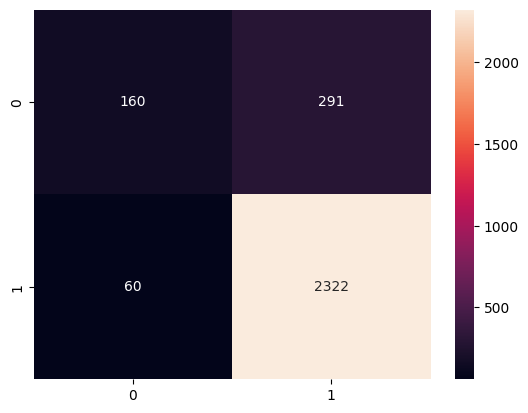

In [73]:
#Naive Bayes Model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state= 12)

gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)

gnb1 = modeleval(gnb)


# Logistic Regression

      TOTAL_VALUE  predicted  residual
4279            1          1         0
482             1          1         0
6737            1          1         0
3983            1          1         0
3288            0          0         0

Regression statistics

               Mean Error (ME) : -0.0659
Root Mean Squared Error (RMSE) : 0.3361
     Mean Absolute Error (MAE) : 0.1130

Regression statistics

               Mean Error (ME) : -0.0589
Root Mean Squared Error (RMSE) : 0.3377
     Mean Absolute Error (MAE) : 0.1140
----------------------------------
Training set r2:  0.14107059511392894
Test set r2:  0.1482134113761563
----------------------------------
AIC :  2798.8884121906285
BIC :  2817.951022879394
----------------------------------
Model Training Accuracy:  0.8870056497175142
Model Testing Accuracy:  0.8859865866572538
---------------------------------------------------
Model Training Precision Score:  0.9017071908949819
Model Testing Precision Score:  0.9038838760298156
-----

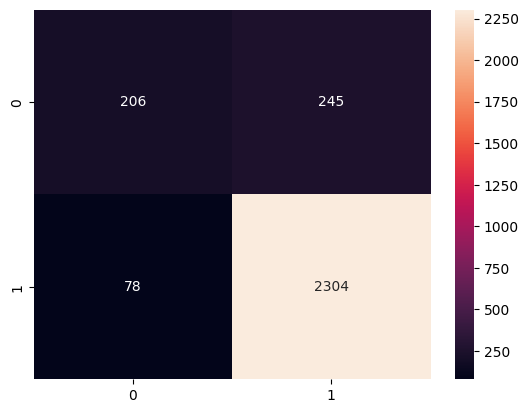

In [75]:
#Since we are dealing with categorical data we have to use logistic regression, else we won't be able to run confusion matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state= 12)

# Create an instance of the LinearRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the outputs for test data points
testpredict = model.predict(X_test)
trainpredict = model.predict(X_train)

#Creating new dataframe based on certain calculated values above
train_results = pd.DataFrame({
    'TOTAL_VALUE': y_train, 
    'predicted': trainpredict, 
    'residual': y_train - trainpredict
})
test_results = pd.DataFrame({
    'TOTAL_VALUE': y_test, 
    'predicted': testpredict, 
    'residual': y_test - testpredict
})
print(train_results.head())

# Evaluate the model using regression summary
# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)

# test set
regressionSummary(test_results.TOTAL_VALUE, test_results.predicted)

#Finding the r2 value of test and train data
print("----------------------------------")
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Test set r2: ', r2_score(test_results.TOTAL_VALUE, test_results.predicted))

print("----------------------------------")
#Confusion Matrix
print('AIC : ', AIC_score(y_train, trainpredict, model))
print('BIC : ', BIC_score(y_train, trainpredict, model))
print("----------------------------------")


log1 = modeleval(model)



In [76]:
# Use predict() to make predictions on a new set
x_test_pred = model.predict(X_test)

result = pd.DataFrame({'Predicted': x_test_pred, 'Actual': y_test,
                       'Residual': y_test - x_test_pred})
print(result.head(20))

      Predicted  Actual  Residual
1466          0       0         0
5489          1       1         0
2678          1       1         0
3122          0       0         0
1545          1       1         0
5595          1       1         0
5232          0       0         0
1963          1       1         0
548           1       1         0
3840          1       0        -1
6432          1       1         0
7065          1       0        -1
2490          1       1         0
2449          1       1         0
3588          1       1         0
4546          0       0         0
3173          0       0         0
555           0       1         1
5591          1       1         0
6370          1       1         0


# Backward Elemination

In [84]:
#Backwards Elimination
def train_model(variables):
    model = LogisticRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    return AIC_score(y_train, model.predict(X_train[variables]), model)

best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Gender, Dependent_count, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Trans_Ct, Avg_Utilization_Ratio, Income_Category
Start: score=2798.89
Step: score=2772.26, remove Income_Category
Step: score=2772.26, remove None
['Gender', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']


In [85]:
regressionSummary(y_test, best_model.predict(X_test[best_variables]))


Regression statistics

               Mean Error (ME) : -0.0593
Root Mean Squared Error (RMSE) : 0.3371
     Mean Absolute Error (MAE) : 0.1137


# Lasso

In [86]:
#Lasso
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y_train)
regressionSummary(y_test, lasso.predict(X_test))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(X_train, y_train)
regressionSummary(y_test, lasso_cv.predict(X_test))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)



Regression statistics

               Mean Error (ME) : -0.0034
Root Mean Squared Error (RMSE) : 0.3659
     Mean Absolute Error (MAE) : 0.2654

Regression statistics

               Mean Error (ME) : -0.0029
Root Mean Squared Error (RMSE) : 0.3120
     Mean Absolute Error (MAE) : 0.2310
Lasso-CV chosen regularization:  8.028149064012671e-06
[ 0.08773012 -0.01363351  0.08473745 -0.0428979  -0.05016038  0.14493872
  0.07213845 -0.00448355]


In [87]:
#Converting 2d array to 1d for dataframe
a = np.squeeze(model.coef_)
b = np.squeeze(lasso_cv.coef_)

In [88]:
#Creating dataframe of logistic and lassocv coefficient
pd.DataFrame({'features': X_train.columns, 'Logistic regression': a, 
              'lassoCV': b })

,features,Logistic regression,lassoCV
0,Gender,0.909779,0.087730
1,Dependent_count,-0.160959,-0.013634
2,Total_Relationship_Count,0.785548,0.084737
3,Months_Inactive_12_mon,-0.452936,-0.042898
4,Contacts_Count_12_mon,-0.516941,-0.050160
5,Total_Trans_Ct,1.520104,0.144939
6,Avg_Utilization_Ratio,0.737327,0.072138
7,Income_Category,-0.033736,-0.004484


In [89]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = X_train.join(y_train)

predictors = X_train.columns
formula = 'Attrition_Flag ~ ' + ' + '.join(predictors)

attr = sm.ols(formula=formula, data=train_df).fit()
print(attr.summary())

                            OLS Regression Results                            
Dep. Variable:         Attrition_Flag   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          1.49e-271
Time:                        20:55:26   Log-Likelihood:                -1077.3
No. Observations:                4248   AIC:                             2173.
Df Residuals:                    4239   BIC:                             2230.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# KNN

In [90]:
#Calculating accuracy for neighors
train_X = main_df
train_y = df2["Attrition_Flag"]
valid_X = main_df
valid_y = df2["Attrition_Flag"]

# Train a classifier for different values of k
results = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.999718
1    2  0.933060
2    3  0.931789
3    4  0.923175
4    5  0.914843
5    6  0.913572
6    7  0.910323
7    8  0.910888
8    9  0.907781
9   10  0.908911
10  11  0.905663
11  12  0.906369
12  13  0.902839
13  14  0.904957
14  15  0.902839
15  16  0.904674
16  17  0.902556
17  18  0.903968
18  19  0.901144
19  20  0.903262
20  21  0.899167
21  22  0.901144
22  23  0.897472
23  24  0.899167
24  25  0.898319
25  26  0.899732
26  27  0.896907
27  28  0.898319
28  29  0.895213
29  30  0.898178
30  31  0.895213
31  32  0.896484
32  33  0.893377
33  34  0.895071
34  35  0.892671
35  36  0.894789
36  37  0.892529
37  38  0.893942
38  39  0.891117
39  40  0.893659
40  41  0.891682
41  42  0.891964
42  43  0.889140
43  44  0.890693
44  45  0.888716
45  46  0.889705
46  47  0.888010
47  48  0.889281
48  49  0.887445


Model Training Accuracy:  0.908427495291902
Model Testing Accuracy:  0.8891634309918814
---------------------------------------------------
Model Training Precision Score:  0.9218791237793613
Model Testing Precision Score:  0.9067663257277734
---------------------------------------------------
ROC_AUC of Model:  0.7210876659945898


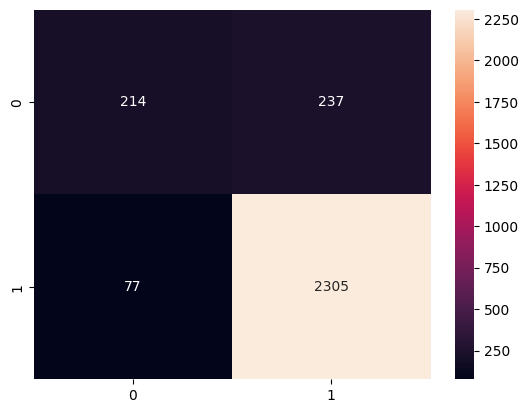

In [92]:
#Train Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state= 12)
# We train the model with the best k, in this case i will pick 10, since i believe i won't be over and underfitting with this
model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

knn1 = modeleval(model)

In [95]:
X_1 = main_df
Y_1 = df2["Attrition_Flag"]
knn = KNeighborsClassifier(n_neighbors=4).fit(X_1, Y_1)
distances, indices = knn.kneighbors(main_df)
print(knn.predict(main_df))
print('Distances',distances)
print('Indices', indices)
print(df2.iloc[indices[0], :])

[1 1 1 ... 1 0 1]
Distances [[0.         0.60561099 0.79644683 0.83155582]
 [0.         1.16850912 1.22072248 1.23266018]
 [0.         0.5782717  0.65295434 0.79080977]
 ...
 [0.         1.07610703 1.14793544 1.21117363]
 [0.         0.58804631 0.68073431 0.74979915]
 [0.         0.40564331 0.43671867 0.74580166]]
Indices [[   0  300 2397 1243]
 [   1 3487  771 2460]
 [   2  375  107 1836]
 ...
 [7078 6554 7031 6929]
 [7079 4975 2482 1244]
 [7080 1110 2542 1404]]
      Attrition_Flag  Gender  Education_Level  Marital_Status  \
0                  1       1                3               1   
300                1       1                3               1   
2397               1       1                0               2   
1243               1       1                2               1   

      Income_Category  Card_Category  Customer_Age  Dependent_count  \
0                   2              0            45                3   
300                 2              0            56              

In [96]:
#Overall Precion, Accuracy and Auc Scores of 3 models
results = pd.DataFrame(data = [knn1, log1, gnb1], 
                       columns = ['Training Accuracy', 'Testing Accuracy', "Testing Precision",'Training Precision',"Roc_Auc"],
                      index = ['KNeighborsClassifier', 'LogisticRegression', "GaussianNB"])
results

,Training Accuracy,Testing Accuracy,Testing Precision,Training Precision,Roc_Auc
KNeighborsClassifier,90.842750,88.916343,90.676633,92.187912,0.721088
LogisticRegression,88.700565,88.598659,90.388388,90.170719,0.712009
GaussianNB,87.358757,87.610307,88.863375,88.840764,0.664789
